In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import sklearn
import cv2
import os

from tensorflow.keras import backend as K


In [2]:
df1=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("D:/Users/Desktop/Scientific-research/Reinforcement Learning/Env/CICIDS2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

df = pd.concat([df1,df2])
df = pd.concat([df,df3])
df = pd.concat([df,df4])
df = pd.concat([df,df5])
df = pd.concat([df,df6])
df = pd.concat([df,df7])
df = pd.concat([df,df8])

del df1,df2,df3,df4,df5,df6,df7,df8

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
print("Total missing values: ", sum(list(df.isna().sum())))

Total missing values:  1358


In [5]:
df = df.dropna()

In [6]:
print("Total missing values: ", sum(list(df.isna().sum())))

Total missing values:  0


In [7]:
y=df[' Label'].values

X=df.drop([' Label'], axis=1).values

print(y.reshape(-1, 1).shape)
print('================')
print(X.shape)

(2829385, 1)
(2829385, 78)


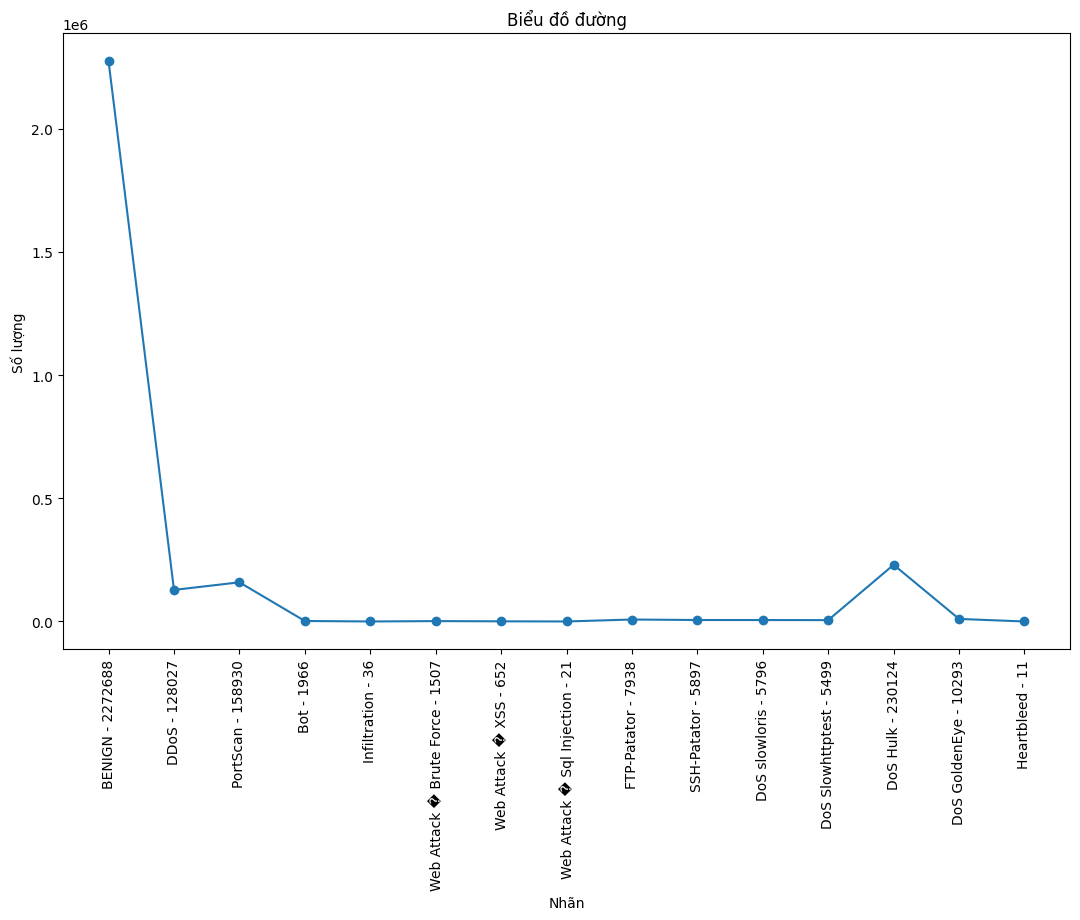

In [8]:
from collections import Counter

sizes = []
labels = []

for i in Counter(y):
    tmp = str(i) + ' - ' + str(Counter(y)[i])
    labels.append(tmp)
    sizes.append(Counter(y)[i])

fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.plot(labels, sizes, marker='o')
plt.title('Biểu đồ đường')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
print(len(y))

labels=np.unique(y)
print(labels)
print(len(labels))
print('-------------------')

classes = []
for i in range(0,len(labels)):
    classes.append(i)
print(classes)
print('-------------------')

map=dict(zip(labels,classes))
print(map)
print('-------------------')


y_class=[]

for i in range(0, len(y)):
    y_class.append(map[y[i]])
    
y_class=np.asarray(y_class)

print(y_class)
print(len(y_class))

2829385
['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack � Brute Force' 'Web Attack � Sql Injection'
 'Web Attack � XSS']
15
-------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
-------------------
{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}
-------------------
[0 0 0 ... 0 0 0]
2829385


In [13]:
import numpy as np

# Khởi tạo bảng Q
num_states = 10  # Số lượng trạng thái
num_actions = 4  # Số lượng hành động
Q = np.zeros((num_states, num_actions))  # Bảng Q ban đầu

# Tham số Q-learning
alpha = 0.1  # Tỷ lệ học
gamma = 0.9  # Hệ số giảm

# Hàm chọn hành động dựa trên epsilon-greedy
def choose_action(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Chọn hành động ngẫu nhiên
        action = np.random.randint(num_actions)
    else:
        # Chọn hành động tốt nhất dựa trên bảng Q
        action = np.argmax(Q[state])
    return action

# Mô phỏng quá trình huấn luyện
num_episodes = 1000  # Số lượng tập huấn luyện
max_steps = 100  # Số lượng bước tối đa trong mỗi tập
epsilon = 0.1  # Tham số epsilon trong epsilon-greedy

for episode in range(num_episodes):
    state = 0  # Trạng thái ban đầu
    total_reward = 0  # Tổng phần thưởng trong mỗi tập
    for step in range(max_steps):
        action = choose_action(state, epsilon)
        # Thực hiện hành động và tính toán next_state và reward từ dataset
        next_state = calculate_next_state(state, action)  # Hàm tính toán next_state dựa trên dataset
        reward = calculate_reward(state, action, next_state)  # Hàm tính toán reward dựa trên dataset và action

        # Cập nhật bảng Q
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]))
        
        state = next_state
        total_reward += reward
        
        if state == goal_state:
            break
    
    print("Episode:", episode, "Total Reward:", total_reward)

# Sau khi huấn luyện, bạn có thể sử dụng bảng Q để thực hiện hành động trong môi trường.

NameError: name 'calculate_next_state' is not defined